In [270]:
import pandas as pd
import numpy as np

## 데이터 로드

In [271]:
data = pd.read_csv('test.csv')

### 제외단지 제거

In [272]:
data = data.loc[(data['단지코드'] != 'C2085') & (data['단지코드'] != 'C1397') & (data['단지코드'] != 'C2431') & (data['단지코드'] != 'C1649') & (data['단지코드'] != 'C1036') & (data['단지코드'] != 'C2675')].reset_index(drop=True)
data = data.loc[(data['단지코드'] != 'C2335') & (data['단지코드'] != 'C1327') & (data['단지코드'] != 'C1095') & (data['단지코드'] != 'C2051') & (data['단지코드'] != 'C1218') & (data['단지코드'] != 'C1894') & (data['단지코드'] != 'C2483') & (data['단지코드'] != 'C1502') & (data['단지코드'] != 'C1988')].reset_index(drop=True)

### 장단기 구분 그룹핑

#### 초장기 ; 국민임대 30년 / 공공임대 50년 / 영구임대 50년 / 공공분양
#### 장기 ; 장기전세 20년 / 공공임대 10년 분납 / 공공임대 10년 / 
#### 단기 ; 행복주택 / 공공임대 5년 / 임대상가 10년

In [273]:
period = np.where((data.공급유형 == '국민임대')|(data.공급유형 == '공공임대(50년)')|(data.공급유형 == '영구임대')|(data.공급유형 == '공공분양'),
        'exL',
        np.where((data.공급유형 == '장기전세')|(data.공급유형 == '공공임대(분납)')|(data.공급유형 == '공공임대(10년)'),
                'L', 'S'))

data['period'] = period

### 전용면적 역시, 어느정도 그룹핑 필요

#### 10 단위로 끊고, 상한80 하한 10 넣어줌

In [274]:
data['전용면적'] = data['전용면적']//10*10

data['전용면적'].describe()

count    1008.000000
mean       37.609127
std        36.434131
min         0.000000
25%        30.000000
50%        30.000000
75%        40.000000
max       580.000000
Name: 전용면적, dtype: float64

In [275]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전용면적', ylabel='Density'>

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from cur

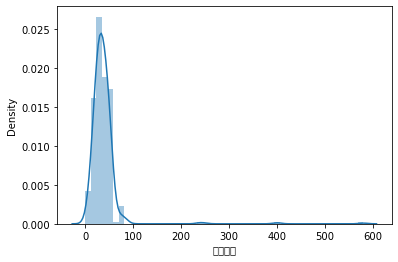

In [276]:
sns.distplot(data['전용면적'])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전용면적', ylabel='Density'>

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from cur

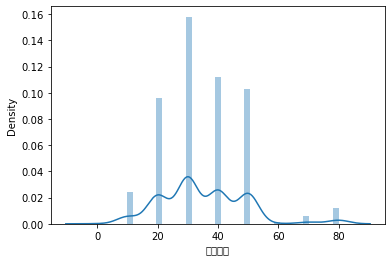

In [277]:
idx = data[data['전용면적']>80].index
data.loc[idx, '전용면적'] = 80

sns.distplot(data['전용면적'])

## 단지코드 - 임대건물구분 매핑

In [278]:
df1 = pd.DataFrame(data.groupby('단지코드').sum()['전용면적별세대수'].reset_index()['단지코드'], columns = ['단지코드'])
temp = data.groupby(['단지코드', '임대건물구분']).sum()['전용면적별세대수'].reset_index()

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '아파트'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left')

df1.columns = ['단지코드','아파트세대수']

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '상가'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left' )

df1.columns = ['단지코드','아파트세대수', '상가세대수']

df1 = df1.fillna(0)

### 총세대수 처리

In [279]:
temp = data[['단지코드', '총세대수']].drop_duplicates()
df1 = temp.merge(df1, on = '단지코드', how = 'left')

In [280]:
df1['세대수합차이'] = df1['총세대수'] - df1['아파트세대수'] - df1['상가세대수']
df1['상가세대수'] = np.where((df1['세대수합차이'] != 0) & (df1['세대수합차이'] <= 14),
                       df1['상가세대수']+df1['세대수합차이'], df1['상가세대수'])

In [281]:
bigdif = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

In [282]:
df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

df1.loc[df1['세대수합차이'] == 0].mean(), df1.loc[df1['단지코드'].isin(bigdif)].mean()

(총세대수      709.713178
 아파트세대수    708.534884
 상가세대수       1.178295
 세대수합차이      0.000000
 상가비율        0.000889
 아파트비율       0.999111
 dtype: float64,
 총세대수      488.00
 아파트세대수    366.00
 상가세대수       0.00
 세대수합차이    122.00
 상가비율        0.00
 아파트비율       0.75
 dtype: float64)

### 부족치 대부분이 아파트임을 비율상 유추할 수 있다. 따라서 아파트로 채움

In [283]:
df1['아파트세대수'] = np.where(df1['세대수합차이']>0, df1['아파트세대수']+df1['세대수합차이'],
                        df1['아파트세대수'])

In [284]:
df1.drop(['세대수합차이', '상가비율','아파트비율'], axis = 1, inplace = True)

## 단지코드 - 기본정보 매핑


#### 제외 : 임대건물구분(df1), 전용면적별세대수, 전용면적, 공급유형, 자격유형
#### 포함 : 총세대수(이미포함), 단지코드, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영),  도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수

In [285]:
temp = data[['단지코드', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', \
                     '도보 10분거리 내 버스정류장 수', '단지내주차면수']].drop_duplicates()


df1 = df1.merge(temp, on = '단지코드', how='left')

### 도보 10분거리 내 지하철역 수(환승노선 수 반영) 결측 처리

#### 지하철 역 수는 해당 지역 평균을 찾아보자

In [286]:
df1.loc[df1['지역'] == '충청남도'].mean()

총세대수                            659.8
아파트세대수                          655.4
상가세대수                             4.4
공가수                               2.6
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0.0
도보 10분거리 내 버스정류장 수                3.8
단지내주차면수                         366.8
dtype: float64

In [287]:
df1.loc[df1['지역'] == '대전광역시'].mean()

총세대수                            757.40
아파트세대수                          753.40
상가세대수                             4.00
공가수                              10.00
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0.75
도보 10분거리 내 버스정류장 수                4.00
단지내주차면수                         494.20
dtype: float64

#### 충남 다 0이니 걍 0으로

#### 대전광역시 17개 중 10곳이 1, 따라서 0혹은 1로 대체해도 무방

#### 충남 0, 대전 1로 가자

In [288]:
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='충청남도')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    0,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='대전광역시')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    1,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)

df1.loc[df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,아파트세대수,상가세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


## 자격유형 / 공급유형 ; 

#### 공급유형
#### 1)단지코드 - 공급유형cat

In [289]:
temp = data.groupby(['단지코드', 'period']).sum().reset_index()

temp1 = temp.loc[temp['period'] == 'exL'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '초장기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

temp2 = temp.loc[temp['period'] == 'L'][['단지코드', '전용면적별세대수']]
temp2.columns = ['단지코드', '장기세대수']
df1 = df1.merge(temp2, on = '단지코드', how = 'left')

temp1 = temp.loc[temp['period'] == 'S'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '단기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

df1 = df1.fillna(0)

#### 2)공급유형 cat 여부 컬럼 ★

In [290]:
df3 = pd.DataFrame(df1.단지코드)
temp = data.groupby(['단지코드', 'period']).sum().reset_index() #단지코드-period별 데이터
for i in data.period.unique():
    temp1 = temp[temp.period == i]
    temp1['공급유형_{}'.format(i)] =1
    temp1 = temp1[['단지코드', '공급유형_{}'.format(i)]]
    df3 = df3.merge(temp1, on='단지코드', how='left')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [291]:
df3 = df3.fillna(0)
df1 = df1.merge(df3, on='단지코드', how='left')

#### 3)단지코드 - 공급유형

In [292]:
for i in data.공급유형.unique():
    temp = data[data.공급유형 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')

In [293]:
df1 = df1.fillna(0)

In [294]:
df1

,단지코드,총세대수,아파트세대수,상가세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,초장기세대수,...,공급유형_exL,공급유형_S,공급유형_L,국민임대_세대수,영구임대_세대수,임대상가_세대수,공공임대(50년)_세대수,공공임대(10년)_세대수,공공임대(분납)_세대수,행복주택_세대수
0,C1072,754,754.0,0.0,경기도,14.0,0.0,2.0,683.0,754.0,...,1.0,0.0,0.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1128,1354,1354.0,0.0,경기도,9.0,0.0,3.0,1216.0,1354.0,...,1.0,0.0,0.0,1354.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1456,619,619.0,0.0,부산광역시,18.0,0.0,16.0,547.0,619.0,...,1.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1840,593,593.0,0.0,전라북도,7.0,0.0,3.0,543.0,593.0,...,1.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1332,1297,1297.0,0.0,경기도,11.0,0.0,2.0,1112.0,1297.0,...,1.0,0.0,0.0,1297.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,C2456,349,349.0,3.0,제주특별자치도,17.0,0.0,4.0,270.0,346.0,...,1.0,0.0,0.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0
143,C1266,596,596.0,5.0,충청북도,35.0,0.0,1.0,593.0,591.0,...,1.0,0.0,0.0,591.0,0.0,0.0,0.0,0.0,0.0,0.0
144,C2152,120,120.0,0.0,강원도,9.0,0.0,1.0,40.0,120.0,...,1.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0
145,C1267,675,675.0,5.0,경상남도,38.0,0.0,1.0,467.0,420.0,...,1.0,1.0,0.0,310.0,110.0,0.0,0.0,0.0,0.0,250.0


## 자격유형

#### 단지코드 - 자격유형cat

In [295]:
ls=[]
for i in data.공급유형.unique():
    temp = data[data.공급유형 == i]
    cert = temp.자격유형.unique()
    ls.append([i, cert])
    
pd.DataFrame(ls)

,0,1
0,국민임대,"[H, A, E, nan, G]"
1,영구임대,"[C, D, nan, I]"
2,임대상가,[D]
3,공공임대(50년),[A]
4,공공임대(10년),[A]
5,공공임대(분납),[A]
6,행복주택,"[J, K, L, M, N]"


- A : 공공임대(50년), 공공임대(10년), 공공임대(분납), 장기전세, 공공임대(5년) - 
- D : 임대상가, 공공분양 - 
- A, C, E, F, I : 영구임대
- J, K, L, M, N, O : 행복주택
- A, B, E, G, H : 국민임대

In [296]:
data['자격유형_cat'] = np.where(data.공급유형 =='행복주택', 'JKLMNO',
        np.where(data.공급유형 == '국민임대', 'ABEGH',
                np.where(data.공급유형 =='영구임대', 'ACEFI',
                        np.where((data.공급유형 =='임대상가') | (data.공급유형 =='공공분양'), 'D', 'A'))))

In [297]:
for i in ['ABEGH', 'A', 'ACEFI', 'D', 'JKLMNO']:
    temp = data[data.자격유형_cat ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
    
df1 = df1.fillna(0)

In [298]:
data['자격유형_cat'].unique()

array(['ABEGH', 'ACEFI', 'D', 'A', 'JKLMNO'], dtype=object)

### 전용면적 그룹
- 상한선 80, 하한선 10
- 구간 10으로
- 이미 그룹핑해둠

In [299]:
data.전용면적 = data.전용면적.astype('int64')
data['전용면적'] = np.where(data['전용면적']<10, 10, data['전용면적'])

In [300]:
for i in data.sort_values('전용면적').전용면적.unique():
    temp = data[data.전용면적 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '전용면적_{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
df1 = df1.fillna(0)

## 아파트/상가 여부 칼럼

In [301]:
df2 = pd.DataFrame(data.groupby('단지코드').sum().reset_index()['단지코드'], columns=['단지코드']) #단지코드 데이터프레임
temp = data.groupby(['단지코드', '임대건물구분']).sum().reset_index() #단지코드-임대건물구분별 데이터프레임
#아파트
apart = temp[temp.임대건물구분 =='아파트'] 
apart['임대건물구분_아파트'] = 1
apart = apart[['단지코드', '임대건물구분_아파트']]
#상가
store = temp[temp.임대건물구분=='상가']
store['임대건물구분_상가'] =1
store = store[['단지코드', '임대건물구분_상가']]
#merge
df2 = df2.merge(apart, on='단지코드', how='left')
df2 = df2.merge(store, on='단지코드', how='left')
df2 = df2.fillna(0)
df2.임대건물구분_상가= df2.임대건물구분_상가.astype('int64')
#df1 - df2 merge
df1 = df1.merge(df2, on='단지코드', how='left')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [302]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '영구임대_세대수', '임대상가_세대수', '공공임대(50년)_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '행복주택_세대수', 'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수',
       'JKLMNO_세대수', '전용면적_10_세대수', '전용면적_20_세대수', '전용면적_30_세대수',
       '전용면적_40_세대수', '전용면적_50_세대수', '전용면적_60_세대수', '전용면적_70_세대수',
       '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

In [303]:
df1['공공임대(5년)_세대수'] = 0
df1['장기전세_세대수'] = 0
df1['공공분양_세대수'] = 0

df1.shape

(147, 40)

In [304]:
df1 = df1[['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가']]

### 나이/성별 인구수 ★
- 나이대별로 합치는건 결과에 그다지 영향 안 미침. 그대로 붙여도 무관

In [255]:
ageinfo = pd.read_csv('age_gender_info.csv')

age = pd.DataFrame()
for i in range(11):
    age['지역'] = ageinfo['지역']
    age['{}0대'.format(i)] = ageinfo.iloc[:, (2*i)+1] + ageinfo.iloc[:, 2*i+2]

df1 = df1.merge(age, on='지역', how='left')

### 1인당 자동차등록수 ★


In [256]:
car_2019 = pd.read_csv('1인당자동차_2019.csv', encoding='euc-kr', header=1)

car_2019.columns = ['지역', '1인당_자동차등록대수', '자동차등록대수', '주민등록인구']
car_2019['1인당자동차'] = car_2019.자동차등록대수 / car_2019.주민등록인구
car_2019 = car_2019[['지역', '1인당자동차']]
df1 = df1.merge(car_2019, on='지역', how='left')

In [257]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차'],
      dtype='object')

In [258]:
df1.shape

(147, 52)

In [259]:
df1.columns = ['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '지하철', '버스', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차']

### 버스정류장 수 이상치 정리 ★

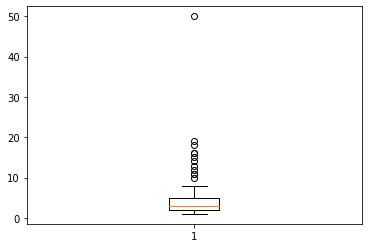

In [260]:
plt.boxplot(df1['버스'])
plt.show()

In [261]:
df1[['지하철', '버스']].describe()

,지하철,버스
count,147.000000,147.000000
mean,0.102041,4.530612
std,0.365174,5.096744
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,0.000000,5.000000
max,2.000000,50.000000


In [262]:
df1['지하철'] = np.where(df1['지하철'] == 0, 0, 1)
df1['버스'] = np.where(df1['버스']>=7,7,df1['버스'])

## 지역 인코딩

In [263]:
df2 = pd.concat([df1.drop('지역', axis = 1),pd.get_dummies(df1.지역)], axis = 1)

In [264]:
df2.shape

(147, 66)

In [265]:
df2.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object')

In [268]:
modelcol =['총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수', '초장기세대수',
       '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도']
for i in range(len(modelcol)):
    print(df2.columns[i+1], modelcol[i])

총세대수 총세대수
아파트세대수 아파트세대수
상가세대수 상가세대수
공가수 공가수
지하철 지하철
버스 버스
단지내주차면수 단지내주차면수
초장기세대수 초장기세대수
장기세대수 장기세대수
단기세대수 단기세대수
공급유형_exL 공급유형_exL
공급유형_S 공급유형_S
공급유형_L 공급유형_L
국민임대_세대수 국민임대_세대수
공공임대(50년)_세대수 공공임대(50년)_세대수
영구임대_세대수 영구임대_세대수
임대상가_세대수 임대상가_세대수
공공임대(10년)_세대수 공공임대(10년)_세대수
공공임대(분납)_세대수 공공임대(분납)_세대수
장기전세_세대수 장기전세_세대수
공공분양_세대수 공공분양_세대수
행복주택_세대수 행복주택_세대수
공공임대(5년)_세대수 공공임대(5년)_세대수
ABEGH_세대수 ABEGH_세대수
A_세대수 A_세대수
ACEFI_세대수 ACEFI_세대수
D_세대수 D_세대수
JKLMNO_세대수 JKLMNO_세대수
전용면적_10_세대수 전용면적_10_세대수
전용면적_20_세대수 전용면적_20_세대수
전용면적_30_세대수 전용면적_30_세대수
전용면적_40_세대수 전용면적_40_세대수
전용면적_50_세대수 전용면적_50_세대수
전용면적_60_세대수 전용면적_60_세대수
전용면적_70_세대수 전용면적_70_세대수
전용면적_80_세대수 전용면적_80_세대수
임대건물구분_아파트 임대건물구분_아파트
임대건물구분_상가 임대건물구분_상가
00대 00대
10대 10대
20대 20대
30대 30대
40대 40대
50대 50대
60대 60대
70대 70대
80대 80대
90대 90대
100대 100대
1인당자동차 1인당자동차
강원도 강원도
경기도 경기도
경상남도 경상남도
경상북도 경상북도
광주광역시 광주광역시
대구광역시 대구광역시
대전광역시 대전광역시
부산광역시 부산광역시
서울특별시 서울특별시
세종특별자치시 세종특별자치시
울산광역시 울산광역시
전라남도 전라남도
전라북도 전라북도
제주특별자치도 제주특별자치도
충청남도 충청남도
충청북도 충청북도


서울이 빠짐, 채워야함

In [267]:
df2['서울특별시'] = 0

df2 = df2[['단지코드','총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수', '초장기세대수',
       '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도']]

In [269]:
df2.to_csv('0727_try1.csv')

## 모델링

In [73]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 다중공선성 확인

In [70]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 85)

pandas version:  1.2.5


In [67]:
x = df2.columns.difference(['등록차량수'], sort=False).difference(['단지코드'], sort=False)
# x = ['임대건물구분_아파트', '임대건물구분_상가', '공가수', '지하철역 수', '버스정류장 수', '단지내주차면수']
X= df2[x]
y = pd.DataFrame(df2['등록차량수'])

In [68]:
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     55.67
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          4.92e-134
Time:                        01:18:56   Log-Likelihood:                -2621.4
No. Observations:                 411   AIC:                             5329.
Df Residuals:                     368   BIC:                             5502.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
총세대수              2.5539      1.555      1.643

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,inf,총세대수
1,inf,아파트세대수
2,26.925446,상가세대수
3,2.013108,공가수
4,1.810327,지하철
5,1.221231,버스
6,22.477092,단지내주차면수
7,inf,초장기세대수
8,inf,장기세대수
9,inf,단기세대수


## Modeling

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
ereg = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg.fit(X_train, y_train)
    
a=[]

a.append(round(mean_absolute_error(y_test, reg1.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg2.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg3.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg4.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg5.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, ereg.predict(X_test)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a

result_models

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3759614.4954916686, tolerance: 5144.159359756099
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3320269.379164387, tolerance: 5144.159359756099
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f

,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,95.849,94.201,93.416,92.543,96.381,87.318


In [74]:
from sklearn.ensemble import VotingRegressor

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    reg5.fit(X_train, y_train)

    ereg = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
    ereg.fit(X_train, y_train)
    
    a=[]

    a.append(round(mean_absolute_error(y_test, reg1.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg2.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg3.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg4.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg5.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, ereg.predict(X_test)),3))


    result_models.loc[len(result_models)] = a
result_models.mean()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2472021.936928062, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993569.182705678, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

RFR           122.47990
LASSO         119.45520
ELASTICNET    119.15236
GRADIENT      123.62520
XGB           132.46650
Voting        114.14094
dtype: float64

In [76]:
result_models

,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,142.804,123.817,121.178,141.970,164.796,130.917
1,130.628,120.583,115.946,132.325,146.198,122.680
2,120.687,120.709,119.325,125.707,131.746,115.590
3,124.360,137.123,146.871,119.105,125.491,112.163
4,130.866,126.150,147.918,139.308,147.841,116.302
5,124.280,107.986,104.439,122.032,132.283,111.168
6,116.671,123.827,120.918,118.677,132.888,109.495
7,121.167,122.958,117.563,114.397,132.231,112.316
8,117.652,110.035,108.826,112.856,125.210,109.775
9,113.970,108.048,110.501,113.402,129.738,106.779
